In [133]:
#@formatter:off
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

%matplotlib inline
# sns.set_theme(style='whitegrid')
plt.style.use('default')
#@formatter:on

# Linear regression

[[0.85976909]
 [0.76005616]
 [0.98791152]
 [0.171926  ]
 [1.28235191]
 [0.09511547]
 [0.08915495]
 [0.27978208]
 [0.62005521]
 [1.98285018]]
[[1.         0.85976909]
 [1.         0.76005616]
 [1.         0.98791152]
 [1.         0.171926  ]
 [1.         1.28235191]
 [1.         0.09511547]
 [1.         0.08915495]
 [1.         0.27978208]
 [1.         0.62005521]
 [1.         1.98285018]]
[[ 7.27572055]
 [ 7.24332893]
 [ 7.89027259]
 [ 4.87763569]
 [ 7.8800079 ]
 [ 4.46076746]
 [ 5.25120348]
 [ 5.47167655]
 [ 5.95808341]
 [10.10810505]]


Text(0, 0.5, 'y')

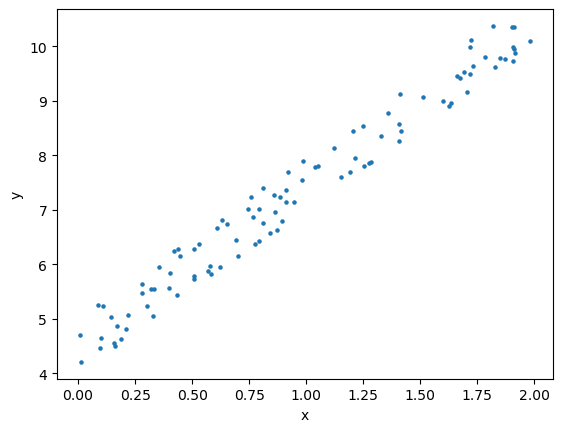

In [134]:
m = 100
X = 2 * np.random.rand(m, 1)
print(X[:10])
X_b = np.c_[np.ones((m, 1)), X]
print(X_b[:10])
y = 4 + 3 * X + np.random.rand(m, 1)
print(y[:10])

plt.scatter(X, y, s=5)
plt.xlabel('x')
plt.ylabel('y')

In [135]:
theta_best = np.linalg.inv(X_b.T @ X_b) @ X_b.T @ y
print(theta_best)

[[4.5136861 ]
 [2.92388716]]


[[1. 0.]
 [1. 2.]]
[[ 4.5136861 ]
 [10.36146042]]


Text(0, 0.5, 'y')

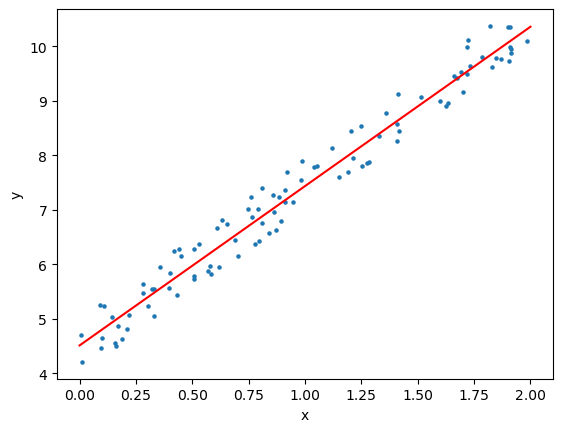

In [136]:
X_ext = np.array([[0], [2]])
X_ext_b = np.c_[np.ones((2, 1)), X_ext]
print(X_ext_b)
y_ext = X_ext_b @ theta_best
print(y_ext)

plt.scatter(X, y, s=5)
plt.plot(X_ext, y_ext, c='r')
plt.xlabel('x')
plt.ylabel('y')

In [137]:
y_predict = X_b @ theta_best
rmse = np.sqrt(1 / m * np.sum((y_predict - y) ** 2))
print(rmse)

0.30900737459193534


## Scikit Linear regression

In [138]:
lin_reg = LinearRegression()
lin_reg.fit(X, y)
print(lin_reg.intercept_, lin_reg.coef_)
skl_ext_predict = lin_reg.predict(X_ext)
print(skl_ext_predict)
skl_predict = lin_reg.predict(X)
lin_mse = mean_squared_error(skl_predict, y)
print(np.sqrt(lin_mse))

[4.5136861] [[2.92388716]]
[[ 4.5136861 ]
 [10.36146042]]
0.3090073745919354


# Gradient descent

### Pocket

In [139]:
eta = 0.1  # learning speed
n_iterations = 1000
theta = np.random.randn(2, 1)
for n_iterations in range(n_iterations):
    gradient = 2 / m * (X_b.T @ (X_b @ theta - y))
    theta = theta - eta * gradient
print(theta)

[[4.5136861 ]
 [2.92388716]]


### Pocket + tolerant

In [140]:
epsilon = np.array([[0.0001], [0.0001]])
gradient = np.array([[1], [1]])
theta = np.random.randn(2, 1)
n_iterations = 0

while np.any(np.abs(gradient) > epsilon):
    gradient = 2 / m * (X_b.T @ (X_b @ theta - y))
    theta = theta - eta * gradient
    n_iterations += 1

print(theta)
print(n_iterations)

[[4.51338968]
 [2.92414808]]
242


### Stochastic + simulated annealing

In [141]:
def learning_schedule(t, t0=5, t1=50):
    return t0 / (t + t1)


n_epochs = 50
theta = np.random.randn(2, 1)

for epoch in range(n_epochs):
    for i in range(m):
        random_index = np.random.randint(m)
        xi, yi = X_b[[random_index]], y[[random_index]]
        gradient = 2 * (xi.T @ (xi @ theta - yi))
        eta = learning_schedule(epoch * m + i)
        theta = theta - eta * gradient
print(theta)

[[4.52687227]
 [2.91957252]]


### Mini-pocket

In [142]:
eta = 0.1
sample_size = 10
theta = np.random.randn(2, 1)

for epoch in range(n_epochs):
    for i in range(int(m / sample_size)):
        random_indices = np.random.randint(m, size=sample_size)
        xs, ys = X_b[random_indices], y[random_indices]
        gradient = 2 / sample_size * (xs.T @ (xs @ theta - ys))
        theta = theta - eta * gradient
print(theta)

[[4.45322347]
 [2.88688056]]


## Scikit Gradient descent
